In [1]:
%matplotlib inline
#
from LRGSG_package.config.utils import find_shared_p_values
from LRGSG_package.shared import *
from lrgsglib.core import Lattice2D, move_to_rootf
from LRGSG_package.config.plotlib import log_binning
#
move_to_rootf(print_tf=True)
plt.style.use("ipynb/nb_plotsheet.mplstyle")

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [12]:
lrgpath = "data/cluster_data/l2d_squared/lrgsg/"
# Pattern to match "p=VALUE" where VALUE is the p value
pattern = r"p=([\d.]+)"

# Dictionary to hold sets of subdirectories for each found p value
p_values_dirs = defaultdict(set)

# Use glob to iterate over all .pkl files in subfolders of 'data/'
for filepath in glob.glob(f'{lrgpath}*/*.pkl'):
    match = re.search(pattern, filepath)
    if match:
        # Extract the p value
        p_value = float(match.group(1))
        # Extract subdirectory from the filepath
        # Adjust the split index based on your path structure
        subdirectory = filepath.split('/')[4]
        # Add the subdirectory to the set for this p value
        p_values_dirs[p_value].add(subdirectory)

# Prepare a list to hold p values and the number of sharing subdirectories
p_values_shared_count = []

# Filter and count p values that appear in at least two different subdirectories
for p_value, dirs in p_values_dirs.items():
    num_shared = len(dirs)
    if num_shared >= 2:
        p_values_shared_count.append((p_value, num_shared))

# Sort the list by p value
p_values_shared_count.sort()

# Print p values and their shared count
for p_value, count in p_values_shared_count:
    print(f"p={p_value} is shared by {count} subdirectories")

p=0.09 is shared by 8 subdirectories
p=0.0958 is shared by 8 subdirectories
p=0.102 is shared by 8 subdirectories
p=0.107 is shared by 8 subdirectories
p=0.113 is shared by 8 subdirectories
p=0.119 is shared by 8 subdirectories
p=0.125 is shared by 8 subdirectories
p=0.131 is shared by 8 subdirectories
p=0.136 is shared by 8 subdirectories
p=0.142 is shared by 8 subdirectories
p=0.148 is shared by 8 subdirectories
p=0.154 is shared by 8 subdirectories
p=0.159 is shared by 8 subdirectories
p=0.165 is shared by 8 subdirectories
p=0.171 is shared by 8 subdirectories
p=0.177 is shared by 8 subdirectories
p=0.183 is shared by 8 subdirectories
p=0.188 is shared by 8 subdirectories
p=0.194 is shared by 8 subdirectories
p=0.2 is shared by 8 subdirectories


### Plot sizes count

/home/opisthofulax/anaconda3/envs/LRG-Signed/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


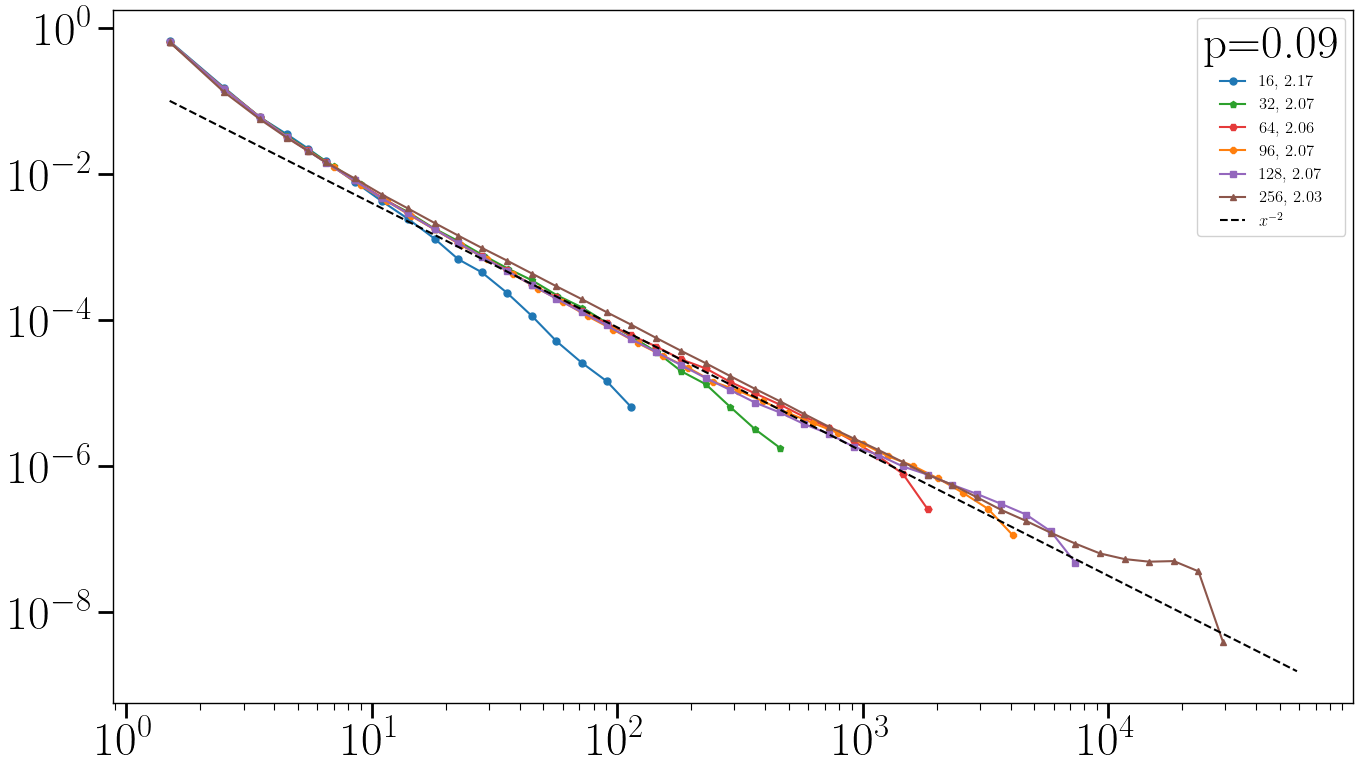

/home/opisthofulax/anaconda3/envs/LRG-Signed/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


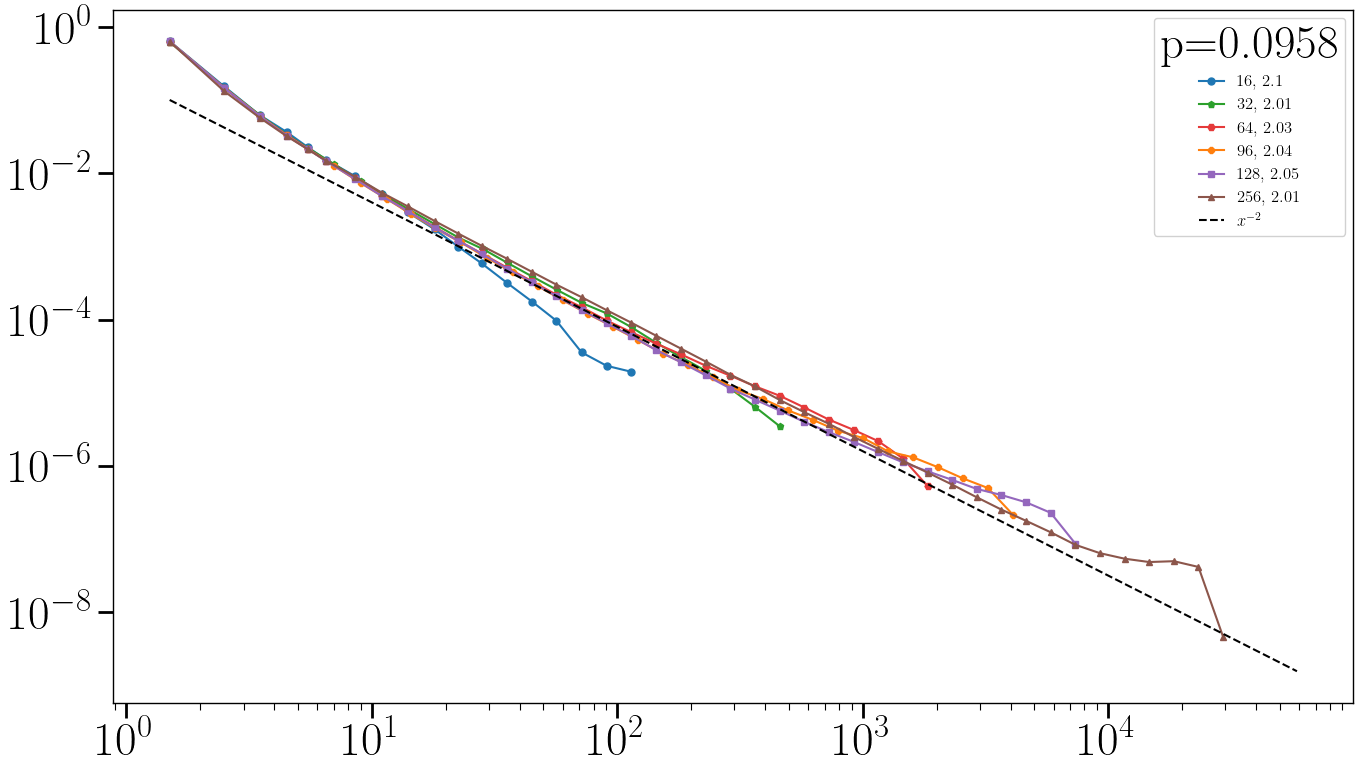

/home/opisthofulax/anaconda3/envs/LRG-Signed/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


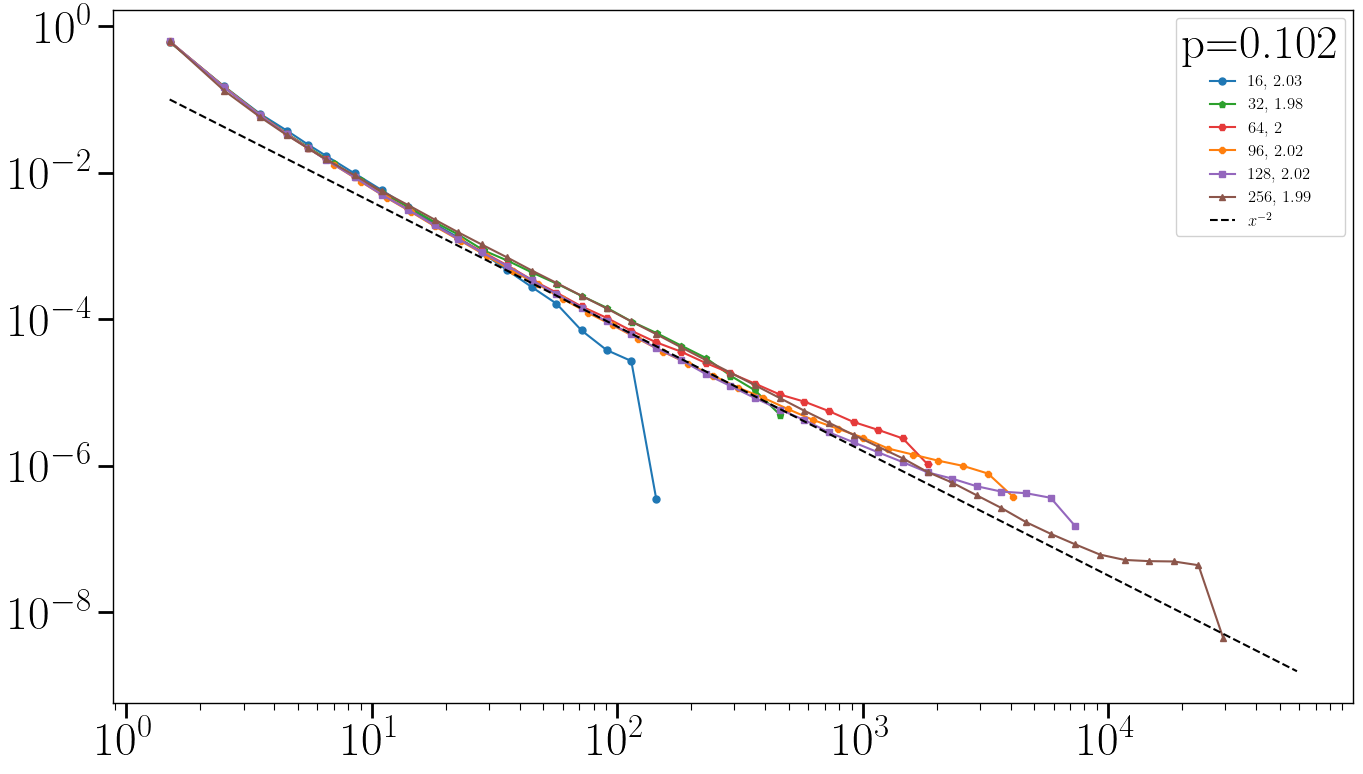

/home/opisthofulax/anaconda3/envs/LRG-Signed/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


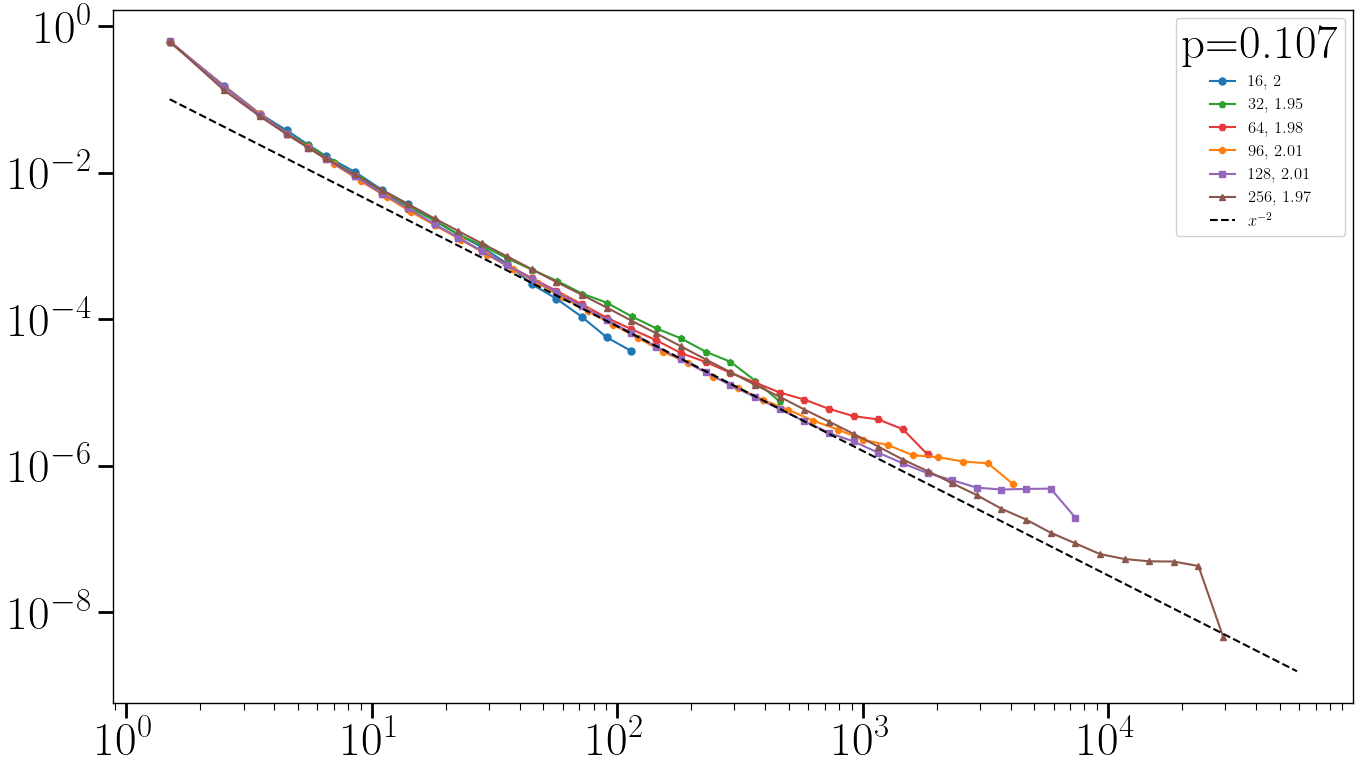

/home/opisthofulax/anaconda3/envs/LRG-Signed/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


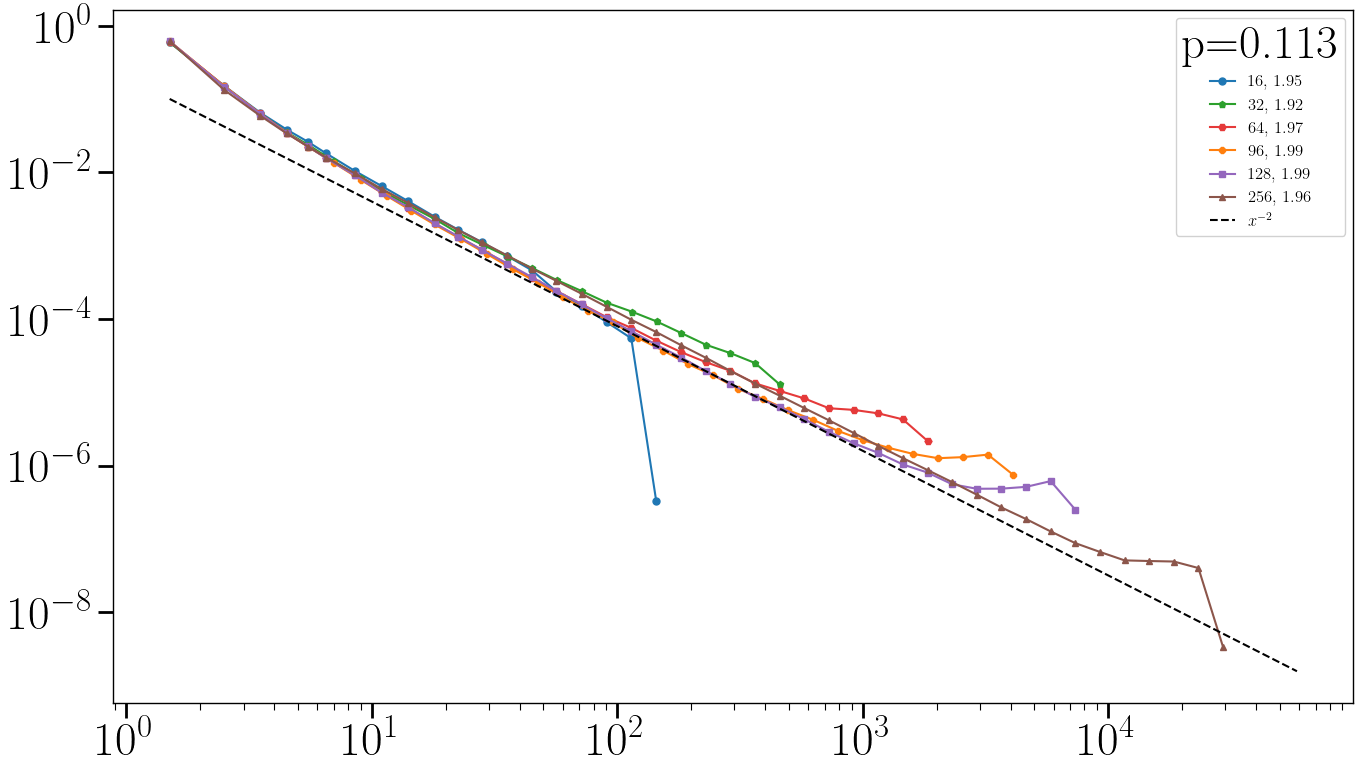

/home/opisthofulax/anaconda3/envs/LRG-Signed/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


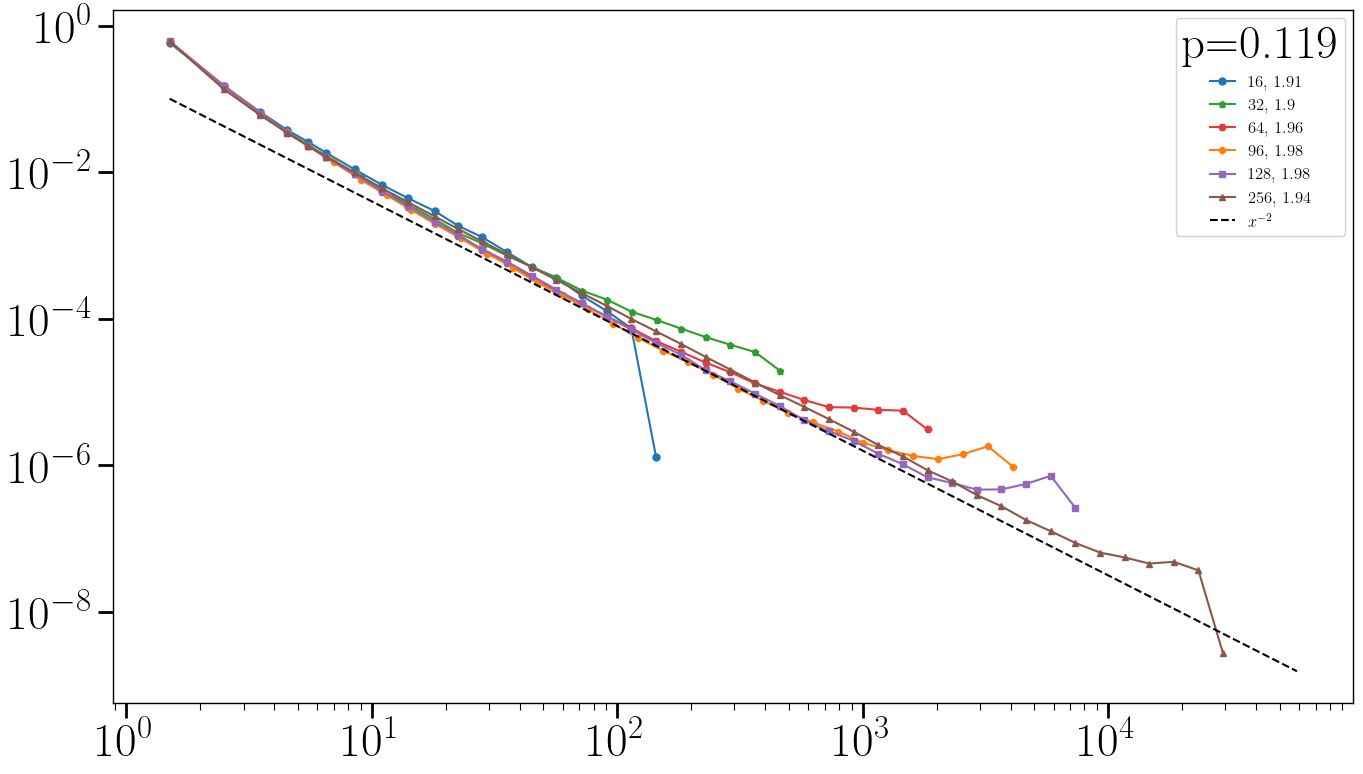

/home/opisthofulax/anaconda3/envs/LRG-Signed/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


KeyboardInterrupt: 

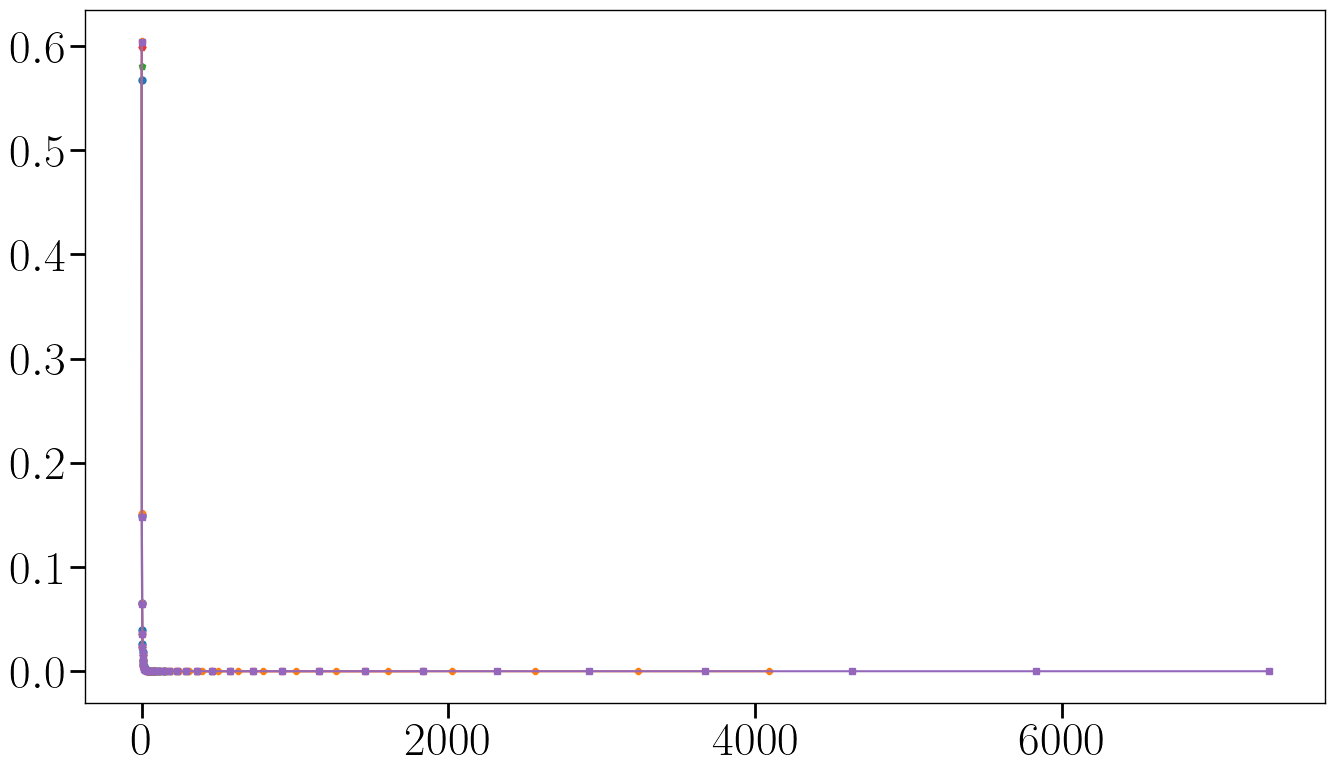

In [13]:

cell = 'rand'
number_of_averages = 10000
for p,_ in p_values_shared_count:
    plt.figure()
    for side in [16, 32, 64, 96, 128, 256]:
        fpath = f"{lrgpath}N={side**2}/pCluster_p={p:.3g}_{cell}_na={number_of_averages}.pkl"
        try:
            with open(fpath, 'rb') as file:
                data = pk.load(file)
        except:
            continue
        sizes, counts = map(np.array, zip(*sorted(data.items())))
        data = np.repeat(sizes, counts)
        # plt.plot(sizes, counts/side**2, label=f"{side}")
        # try:
        # bc, h, bw = log_binning(data, binnum=20)
        # h = h/bw
        # h = h/np.sum(bc*h)
        # h = h[np.where(h>0)[0]]
        # bc = bc[np.where(h>0)[0]]
        # fit = powerlaw.Fit(data)

        # # PDF of the fitted power-law distribution
        # # x_min is the lower bound for fitting the power-law
        # # pdf = fit.power_law.pdf(fit.xmins)        # except ValueError:
        # x_min = fit.xmin
        # x_max = max(data)
        # x = np.linspace(fit.xmin, max(data), 1000)
        # pdf = fit.power_law.pdf(x)
        # plt.plot(x, pdf, 'r-', label='Power-law PDF')
        fit1 = powerlaw.Fit(data, xmin=1, xmax=side**2, discrete=True, fit_method='KS')
        bins1, prob1 = fit1.pdf(linear_bins=False)
        bins1 = (bins1[1:]+bins1[:-1])/2.0
        prob1[prob1 == 0] = 'nan'
        plt.plot(bins1, prob1, label=f"{side}, {fit1.alpha:.3g}")
        # plt.scatter(data, np.zeros_like(data), alpha=0.1)
        #     pass
    plt.plot(bins1, 0.2*bins1**(-1.7), 'k--', label=r"$x^{-2}$")
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(title=f"p={p:.3g}")
    plt.show()